# Part1. Introduction 

### 1.1 Objective 

The objective of this project is to predict the quality credit using German credit data set. The data sets were obtained from the UCI Machine Learning Repository (Hofmann H., 1994)  
his project has two phases. Phase I focuses on data preprocessing and exploration, as covered in this report. We shall present model building in Phase II. The rest of this report is organised as follows. Section 2 describes the data sets and their attributes. Section 3 covers data pre-processing. In Section 4, we explore each attribute and their inter-relationships. The last section presents a brief summary. Compiled from Jupyter Notebook.

### 1.2 Data sets

The data sets we intend to use from UCI Machine Learning Repository webiste includes 'German.data' and 'German.doc' that contains the description of the variables. The dataset contains 21 varialbes, including 1 binary target variable.

# Part2. Data Pre-processing 

### 2.1 Loading Data and Libararies

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
credit = pd.read_csv('german.data', sep = ' ')

In [3]:
credit.columns = ['status_of_existing_checking_account', 'duration_month', 'credit_history', 'purpose',
                  'credit_amount','savings_account','present_employment_since','IRPDI','personal_status_and_sex',
                 'other_debtors','present_residence_since','property', 'age', 'other_installment_plans',
                  'housing','number_of_existing_credits','job','liable_ppl_num','telephone','foreign_worker',
                  'credit_classification']

In [4]:
credit.head()

,status_of_existing_checking_account,duration_month,credit_history,purpose,credit_amount,savings_account,present_employment_since,IRPDI,personal_status_and_sex,other_debtors,...,property,age,other_installment_plans,housing,number_of_existing_credits,job,liable_ppl_num,telephone,foreign_worker,credit_classification
0,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
1,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
2,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
3,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
4,A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,1


### 2.2 Data Cleaning and Transformation

In [5]:
#check the shape of data 
credit.shape

(999, 21)

The dataset contains 21 variables and 999 observations.

In [6]:
# check the data type. 
credit.dtypes

status_of_existing_checking_account    object
duration_month                          int64
credit_history                         object
purpose                                object
credit_amount                           int64
savings_account                        object
present_employment_since               object
IRPDI                                   int64
personal_status_and_sex                object
other_debtors                          object
present_residence_since                 int64
property                               object
age                                     int64
other_installment_plans                object
housing                                object
number_of_existing_credits              int64
job                                    object
liable_ppl_num                          int64
telephone                              object
foreign_worker                         object
credit_classification                   int64
dtype: object

The data set contains 13 objects, 7 numerical features with 1 binary target variable. 

In [7]:
#check for missing value 
credit.isnull().sum()
#there's no missing value. 

status_of_existing_checking_account    0
duration_month                         0
credit_history                         0
purpose                                0
credit_amount                          0
savings_account                        0
present_employment_since               0
IRPDI                                  0
personal_status_and_sex                0
other_debtors                          0
present_residence_since                0
property                               0
age                                    0
other_installment_plans                0
housing                                0
number_of_existing_credits             0
job                                    0
liable_ppl_num                         0
telephone                              0
foreign_worker                         0
credit_classification                  0
dtype: int64

In [8]:
# statistical summury of the data 
display(HTML('<b>Table 1: Summary of continuous features</b>')) 
display(credit.describe(include = 'int'))
display(HTML('<b>Table 2: Summary of categorical features</b>'))
display(credit.describe(include = 'object'))

,duration_month,credit_amount,IRPDI,present_residence_since,age,number_of_existing_credits,liable_ppl_num,credit_classification
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,20.917918,3273.362362,2.971972,2.843844,35.514515,1.406406,1.155155,1.300300
std,12.055619,2823.365811,1.118802,1.103665,11.337487,0.577639,0.362234,0.458618
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1368.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2320.000000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.500000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


,status_of_existing_checking_account,credit_history,purpose,savings_account,present_employment_since,personal_status_and_sex,other_debtors,property,other_installment_plans,housing,job,telephone,foreign_worker
count,999,999,999,999,999,999,999,999,999,999,999,999,999
unique,4,5,10,5,5,4,3,4,3,3,4,2,2
top,A14,A32,A43,A61,A73,A93,A101,A123,A143,A152,A173,A191,A201
freq,394,530,279,603,339,547,906,332,813,712,629,596,962


According to Table 1, there's no `NaN` or extreme values. However, in categorical variables (Table 2), the number of unique values in `personal_status_and_sex` doesn's match with what is given in the documentation, further investigation is required. The other categorical valuables match the description of the data.

### 2.2.1 Numerical variables

The nemerical variables appeared to be clean at a glance. There is no `NaN` and imposible values in this dataset.  

### 2.2.2 Categorical variables

First of all, the target variable should be a binary obeject instead of integer. We shall correct the data type. 

In [9]:
# make a copy of original data
credit_clean = credit 

#change the data type of 'Credit_classification'
credit_clean.credit_classification = credit_clean.credit_classification.astype('object')

#check again 
print(credit_clean.credit_classification.dtype)

object


For ease of understanding and exploratory analaysis in the next section, we decided to append the description of the categorical values. 

In [10]:
print(credit_clean[credit_clean.status_of_existing_checking_account == 'A11'].head())


# fake_abalone[['Diameter', 'Rings']][fake_abalone.Rings == 22]
# A11 :      ... <    0 DM
# A12 : 0 <= ... <  200 DM
# A13 :... >= 200 DM /salary assignments for at least 1 year
# A14 : no checking account


   status_of_existing_checking_account  duration_month credit_history purpose  \
2                                  A11              42            A32     A42   
3                                  A11              24            A33     A40   
10                                 A11              48            A32     A49   
12                                 A11              24            A34     A40   
13                                 A11              15            A32     A40   

    credit_amount savings_account present_employment_since  IRPDI  \
2            7882             A61                      A74      2   
3            4870             A61                      A73      3   
10           4308             A61                      A72      3   
12           1199             A61                      A75      4   
13           1403             A61                      A73      2   

   personal_status_and_sex other_debtors          ...           property age  \
2                 

In [11]:
# def RenameAttribute(obj, old_name, new_name):
#     credit_clean.loc[credit_clean[obj] == old_name ] = new_name

In [12]:
# # rename values in categorical variables
# RenameAttribute('status_of_existing_checking_account', 'A11', '<0DM')
# RenameAttribute('status_of_existing_checking_account', 'A12', '0<=...<200DM')
# RenameAttribute('status_of_existing_checking_account', 'A13', '...>=200DM')
# RenameAttribute('status_of_existing_checking_account', 'A14', 'no-checking-account')
             
# RenameAttribute('credit_history', 'A30', 'no-credits-taken')
# RenameAttribute('credit_history', 'A31', 'all-credits-paid-back-duly')
# RenameAttribute('credit_history', 'A32', 'existing-credits-paid-back-duly-till-now')
# RenameAttribute('credit_history', 'A33', 'delay-in-paying-off-in-the-past')
# RenameAttribute('credit_history', 'A34', 'critical-account')

# Attribute 3:  (qualitative)
# 	      Credit history
# 	      A30 : no credits taken/
# 		    all credits paid back duly
#               A31 : all credits at this bank paid back duly
# 	      A32 : existing credits paid back duly till now
#               A33 : delay in paying off in the past
# 	      A34 : critical account/
# 		    other credits existing (not at this bank)


In [13]:
# credit_clean['credit_history'].loc[credit_clean['credit_history'] == 'A32'] = 'T'

In [14]:
#d
# print(credit)

Then, we tally the categorical valuables to check if there is any duplicated categorical value or typo.

In [15]:
#select only categorical valuables 
categorical_variables = credit_clean.select_dtypes('object')
#get names of the columns
categorical_variables_names = categorical_variables.columns.values


#tally the categorical valuables 
for col in categorical_variables_names:
    print(col)
    print(categorical_variables[col].value_counts())
    print(' ') #just add extra space to make it readable
    

status_of_existing_checking_account
A14    394
A11    273
A12    269
A13     63
Name: status_of_existing_checking_account, dtype: int64
 
credit_history
A32    530
A34    292
A33     88
A31     49
A30     40
Name: credit_history, dtype: int64
 
purpose
A43     279
A40     234
A42     181
A41     103
A49      97
A46      50
A45      22
A44      12
A410     12
A48       9
Name: purpose, dtype: int64
 
savings_account
A61    603
A65    182
A62    103
A63     63
A64     48
Name: savings_account, dtype: int64
 
present_employment_since
A73    339
A75    252
A74    174
A72    172
A71     62
Name: present_employment_since, dtype: int64
 
personal_status_and_sex
A93    547
A92    310
A94     92
A91     50
Name: personal_status_and_sex, dtype: int64
 
other_debtors
A101    906
A103     52
A102     41
Name: other_debtors, dtype: int64
 
property
A123    332
A121    281
A122    232
A124    154
Name: property, dtype: int64
 
other_installment_plans
A143    813
A141    139
A142     47
Name: other_i

Based on the output above, there's no duplicated values and `personal_status_and_sex` , mentioned above, is actually only have 4 unique values, which is alright.

# Part3. Explortary Analysis

### 3.1 Univariate Visualisation

#### 3.1.1 Univariate  Visualisation - Categorical

In [16]:
#define a function for barplot
def BarPlot(x):    
    ax = credit_clean[x].value_counts().plot( kind = "bar")
    ax.grid(True, lw = 0.5, ls = '--')


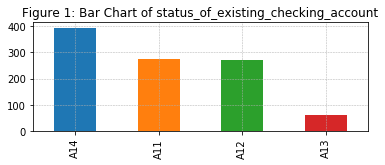

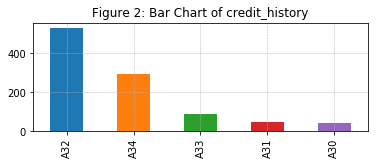

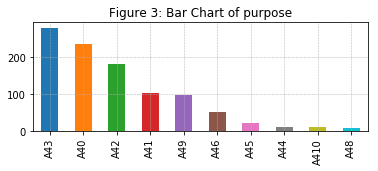

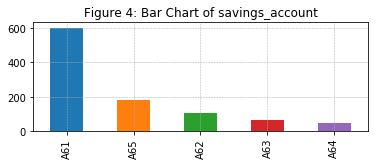

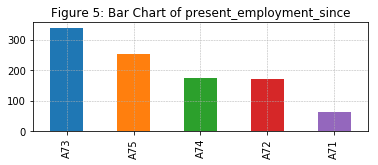

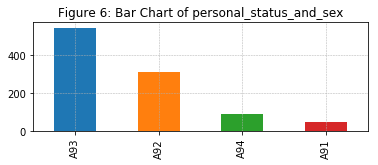

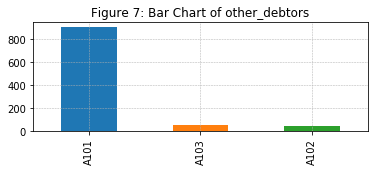

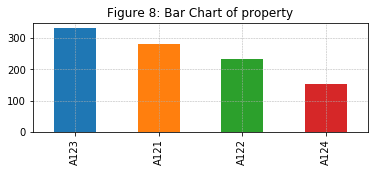

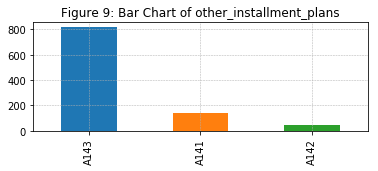

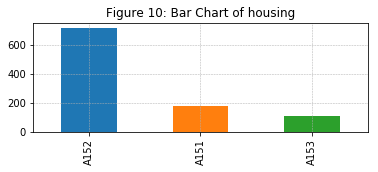

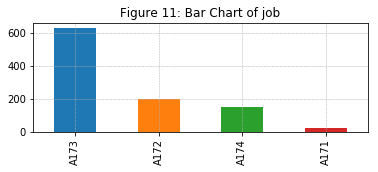

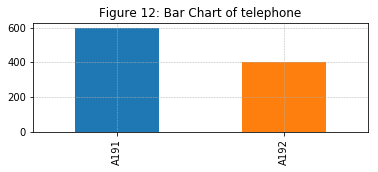

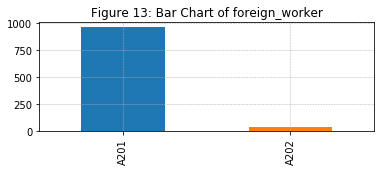

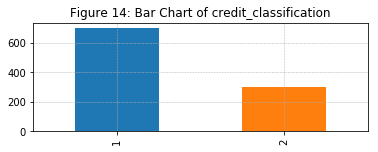

In [17]:
 i = 1 # initialize figure label)
for col in categorical_variables_names:
    plt.figure(figsize=(6,2))
    plt.title("Figure " + str(i) + ": Bar Chart of " + col, fontsize = 12) 
    BarPlot(col)
    plt.show()
    i = i+1

#### 3.1.1 Univariate  Visualisation - Numeric

In [18]:
#define a function for Boxplot & Histogram Plot
def BoxHistogramPlot(x):
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(x, ax=ax_box)
    sns.distplot(x, ax=ax_hist)
    ax_box.set(yticks=[]) 
    sns.despine(ax=ax_hist) 
    sns.despine(ax=ax_box, left=True)
    plt.show()

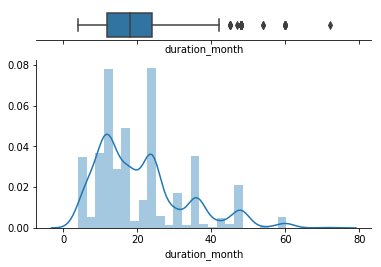

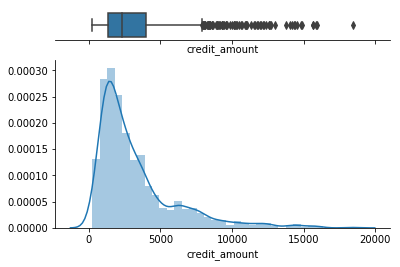

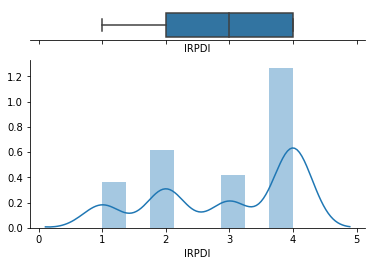

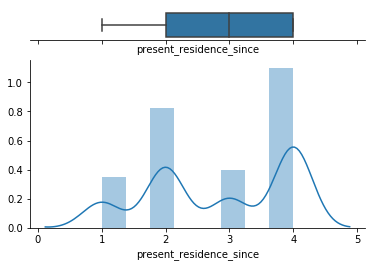

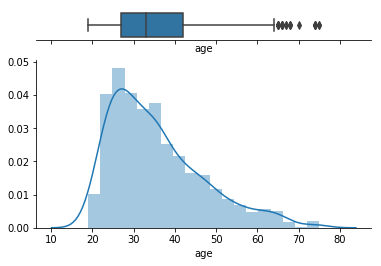

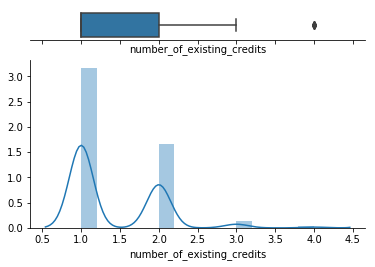

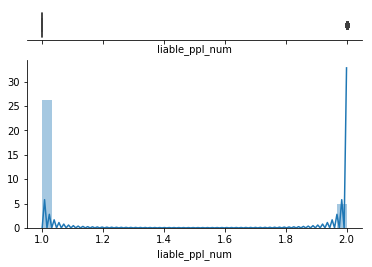

In [19]:
numeric_variables = credit_clean.select_dtypes('int')
numeric_variable_names = numeric_variables.columns.values

for col in numeric_variable_names:
    plt.suptitle("Figure " + str(i) + ": Histogram and Box Plot of " + col) 
    BoxHistogramPlot(credit_clean[col])
    plt.show()
    i=1+i

# #select only categorical valuables 
# categorical_variables = credit_clean.select_dtypes('object')
# #get names of the columns
# categorical_variables_names = categorical_variables.columns.values

### 3.2 Multivariate Visualisation

#### 3.2.1  Histogram of continuous features separated by credit classification

In [42]:
print(numeric_variable_names)

['duration_month' 'credit_amount' 'IRPDI' 'present_residence_since' 'age'
 'number_of_existing_credits' 'liable_ppl_num']


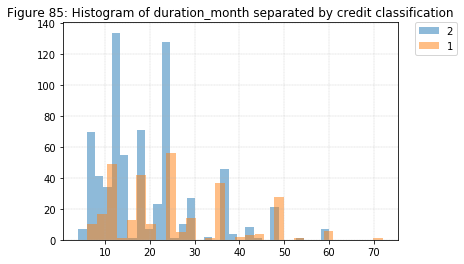

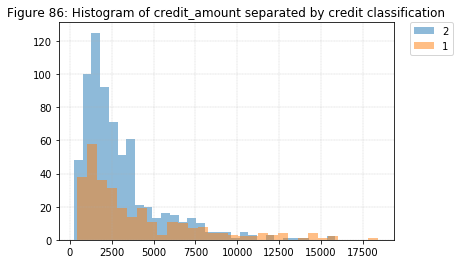

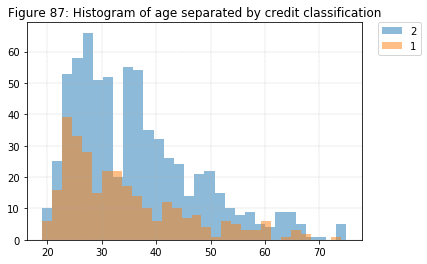

In [43]:
for col in ['duration_month', 'credit_amount' , 'age']: 
    data1 = credit_clean.loc[credit_clean['credit_classification']== 1, col] 
    data2 = credit_clean.loc[credit_clean['credit_classification']== 2, col] 
    plt.hist(data1, alpha = 0.5, bins = 30)
    plt.hist(data2, alpha = 0.5, bins = 30)
    plt.grid(True, lw = 0.3, ls = '--')
    plt.title("Figure " + str(i) + ": Histogram of " + col + " separated by credit classification") 
    i=i+1
    plt.legend(credit_clean['credit_classification'].unique(), bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) 
    plt.show()

### 3.3 Correlation plot of numeric features 

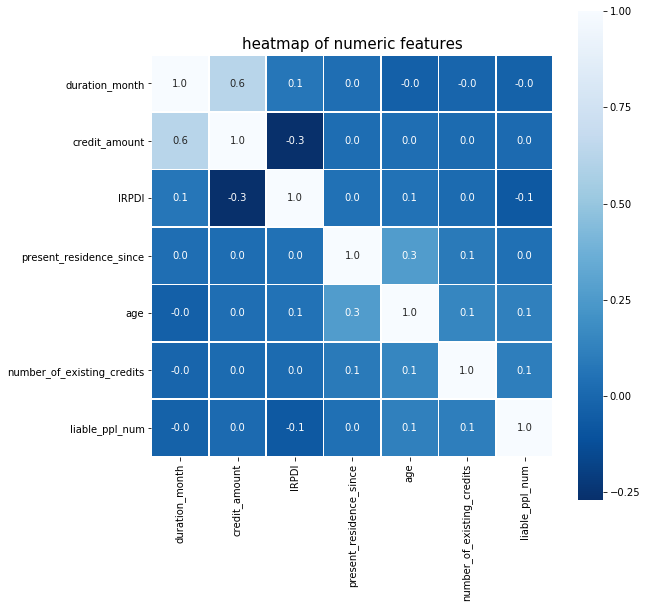

In [21]:
#import module
import numpy as np
import seaborn as sns

# plot the heatmap
corr = numeric_variables.corr()
plt.figure(figsize=(9,9))
plt.xlabel('helix 2 phase', size = 15)
plt.ylabel('helix1 phase', size = 15)
plt.title('heatmap of numeric features', size = 15)
sns.heatmap(corr, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r')

# References
Hofmann H., 1994, Statlog (German Credit Data) Data Set , electronic dataset, UCI Machine Learning Repository, viewed 20 April 2019, < https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)>